In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [58]:
df = pd.read_csv("/content/heart (1).csv")

# Show first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [60]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [61]:
df['target'].value_counts()


,count
target,
1,165
0,138


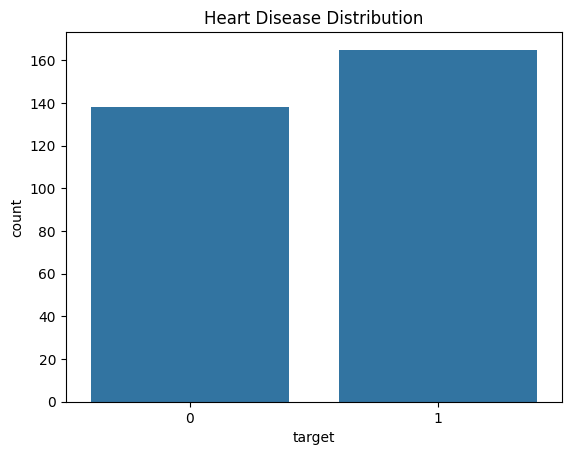

In [62]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()


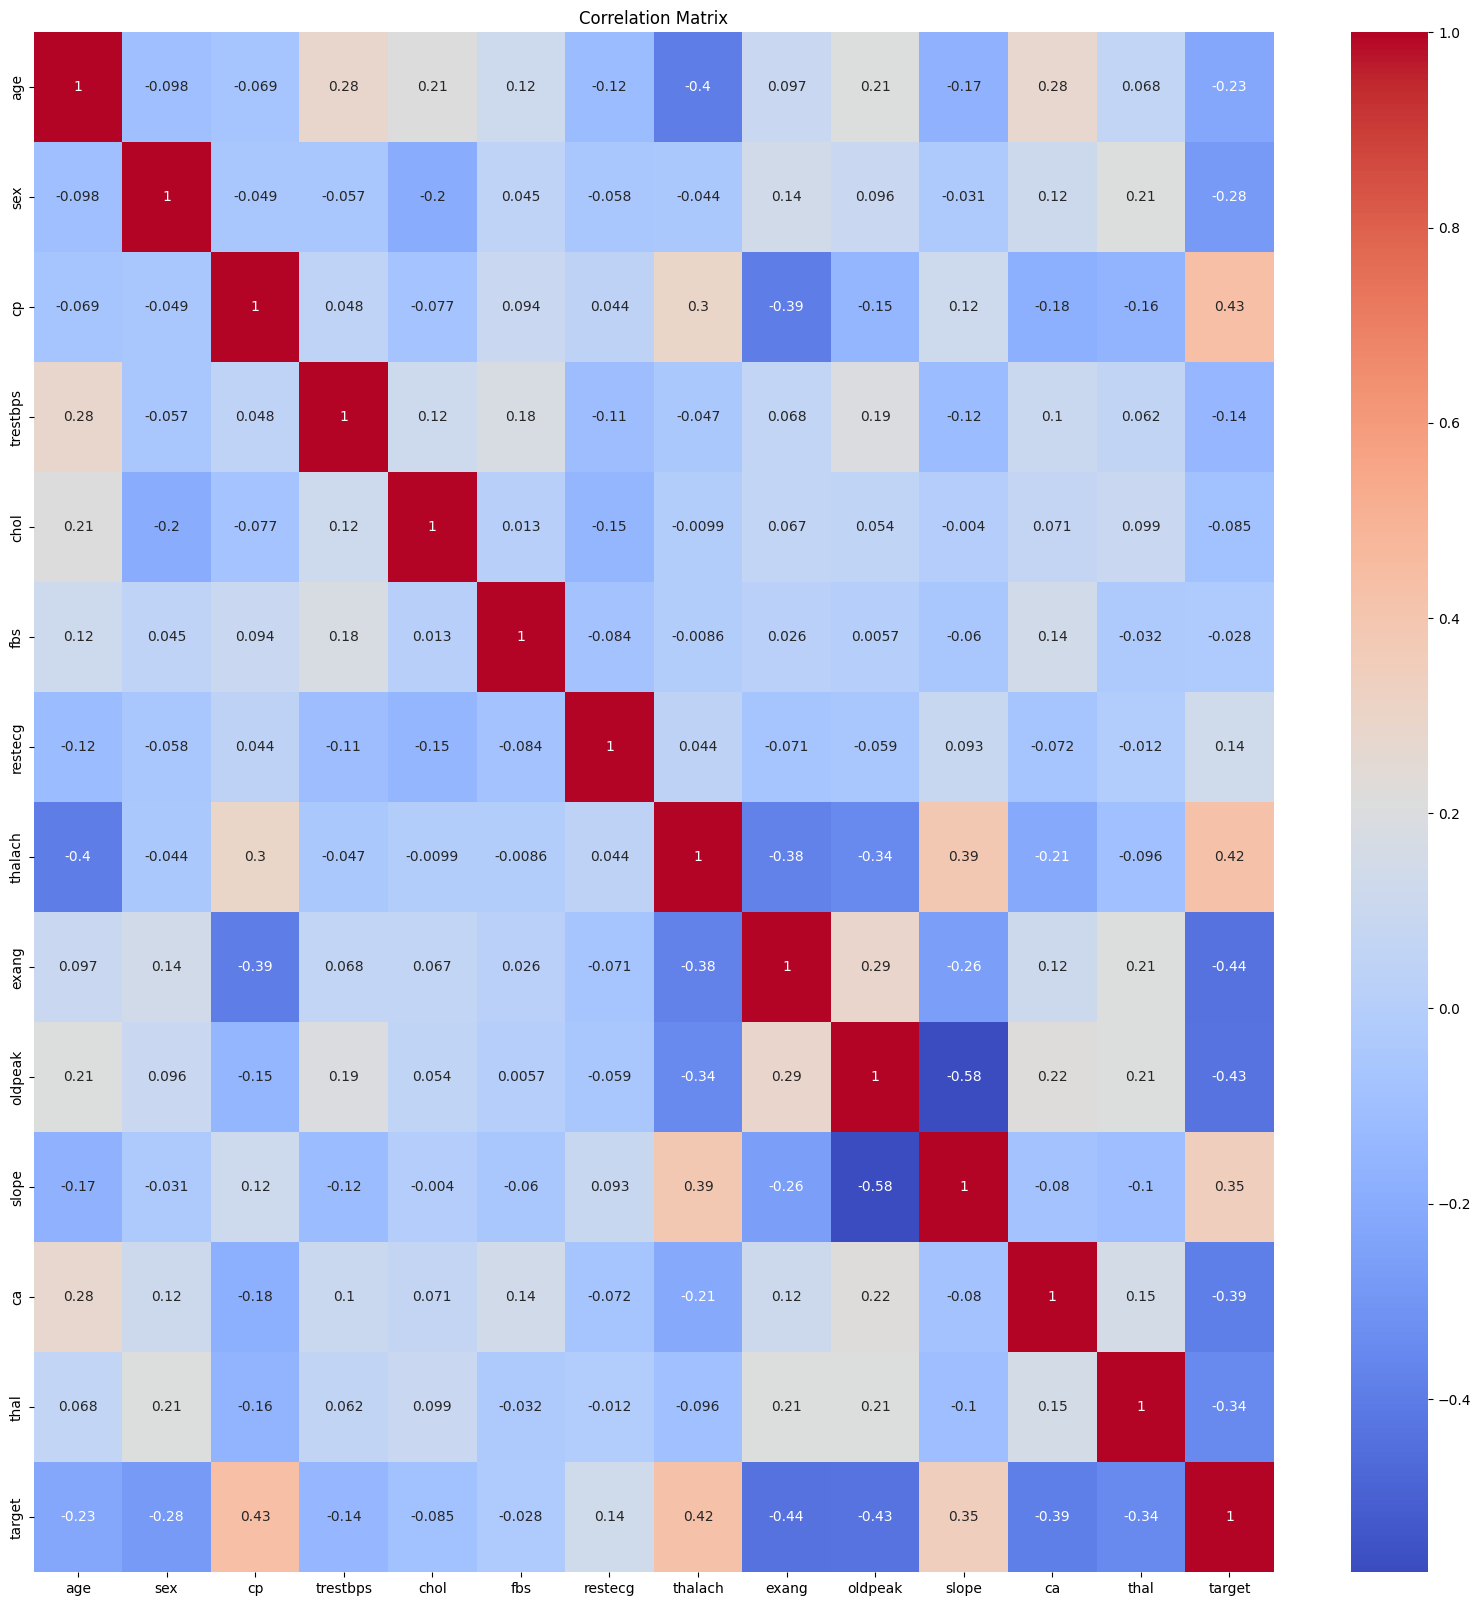

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


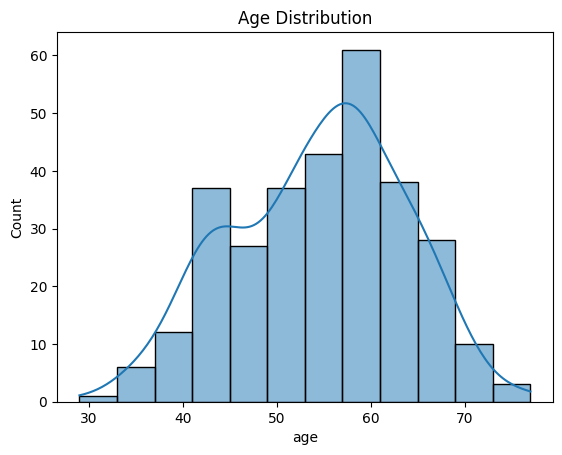

In [64]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


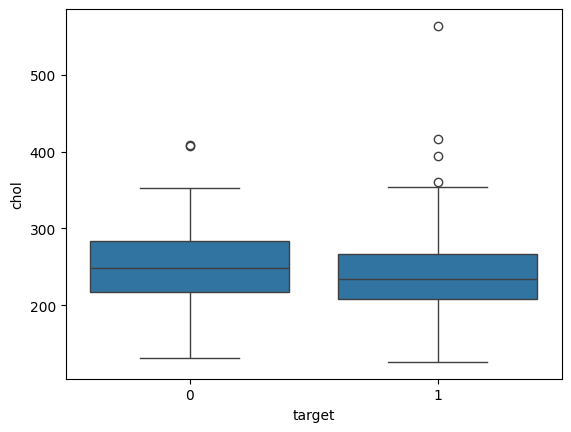

In [65]:
sns.boxplot(x='target', y='chol', data=df)
plt.show()


In [66]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [67]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [69]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [70]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [71]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)


In [72]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)


In [73]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


In [74]:
def evaluate_model(y_test, y_pred, name):

    print("Model:", name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-"*40)


In [75]:
evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, knn_pred, "KNN")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")


Model: Logistic Regression
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

----------------------------------------
Model: KNN
Accuracy: 0.9016393442622951
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

----------------------------------------
Model: Decision Tree
Accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
         

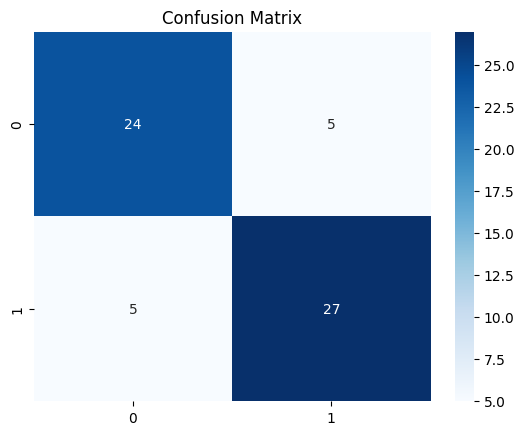

In [76]:
cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [77]:
models = ["LR", "KNN", "DT", "RF"]

accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred)
]

results = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies
})

results


,Model,Accuracy
0,LR,0.852459
1,KNN,0.901639
2,DT,0.786885
3,RF,0.836066


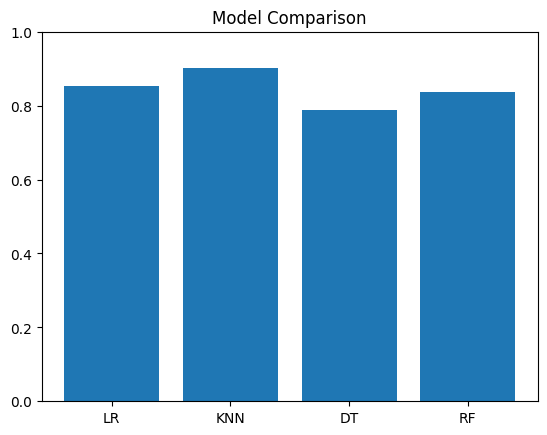

In [78]:
plt.bar(models, accuracies)
plt.ylim(0,1)
plt.title("Model Comparison")
plt.show()


In [79]:
import joblib

joblib.dump(rf, "heart_model.pkl")


['heart_model.pkl']

In [82]:
sample = [62,0,0,140,68,0,0,160,0,3.6,0,2,2]

sample_df = pd.DataFrame([sample], columns=df.columns[:-1])

sample_df = pd.get_dummies(sample_df)
sample_df = sample_df.reindex(columns=X.columns, fill_value=0)

sample_scaled = scaler.transform(sample_df)

prediction = rf.predict(sample_scaled)


In [83]:
# Get probability
prob = rf.predict_proba(sample_scaled)

# Probability of having heart disease (class = 1)
risk_percentage = prob[0][1] * 100

print("Risk of Heart Disease: {:.2f}%".format(risk_percentage))

# Optional: Message
if risk_percentage >= 50:
    print("Status: High Risk")
else:
    print("Status: Low Risk")



Risk of Heart Disease: 12.00%
Status: Low Risk
